In [69]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from umap.umap_ import UMAP
import plotly.express as px

In [70]:
data = load_breast_cancer(as_frame=True)

In [71]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

In [72]:
df.shape

(569, 31)

In [73]:
data = df[0:569]
data = np.asarray(data)

In [74]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [86]:
nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

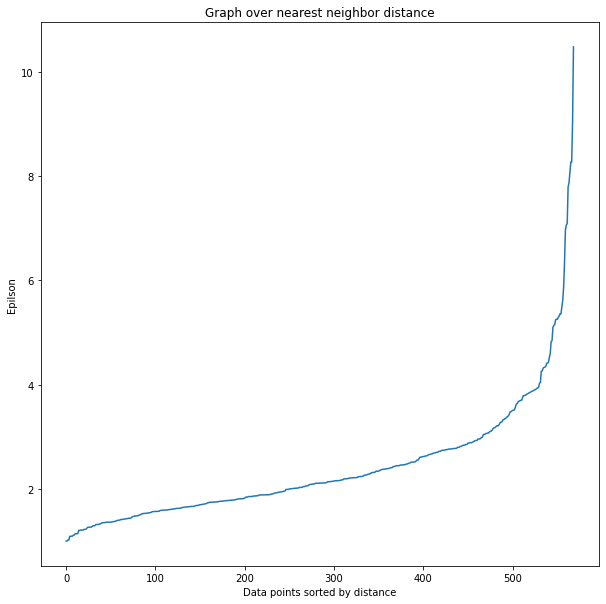

In [87]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('Graph over nearest neighbor distance')
plt.xlabel('Data points sorted by distance')
plt.ylabel('Epilson')
plt.show()

In [77]:
db = DBSCAN(eps = 5, min_samples = 62).fit(scaled_data)
labels = db.labels_

Text(0.5, 1.0, 'With DBSCAN')

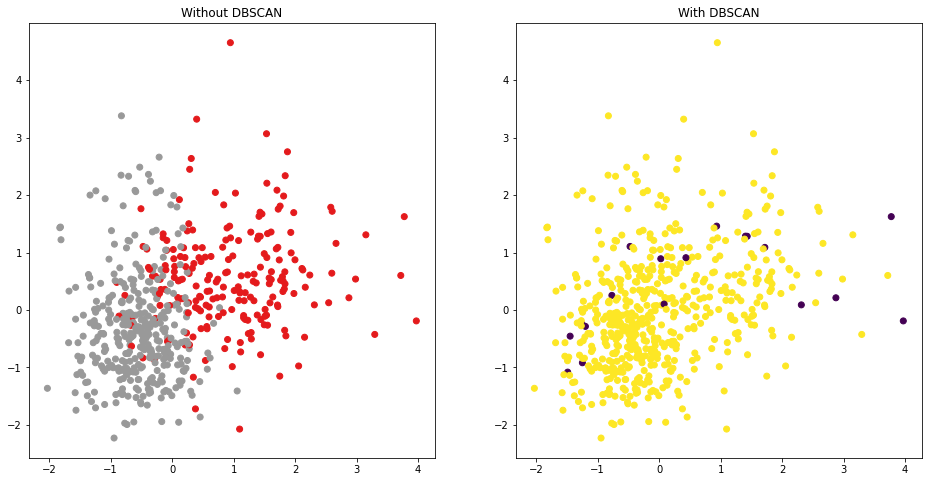

In [78]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[1].scatter(x1, y1, c=dbscan_fitted)
ax[0].set_title('Without DBSCAN')
ax[1].set_title('With DBSCAN')

In [79]:
umap = UMAP(random_state=2)
umap_fitted = umap.fit_transform(scaled_data)

In [80]:
fig = px.scatter(umap_fitted, x=0, y=1, color=labels, title='UMAP')
fig.show()

In [81]:
pca = PCA(n_components=15)
pca_data = pca.fit_transform(scaled_data)

In [82]:
db = DBSCAN(eps = 5, min_samples = 62).fit(pca_data)
pca_labels = db.labels_

In [83]:
umap = UMAP(random_state=2)
umap_fitted = umap.fit_transform(pca_data)

In [84]:
fig = px.scatter(umap_fitted, x=0, y=1, color=pca_labels, title='UMAP with PCA')
fig.show()

Text(0.5, 1.0, 'PCA DBSCAN')

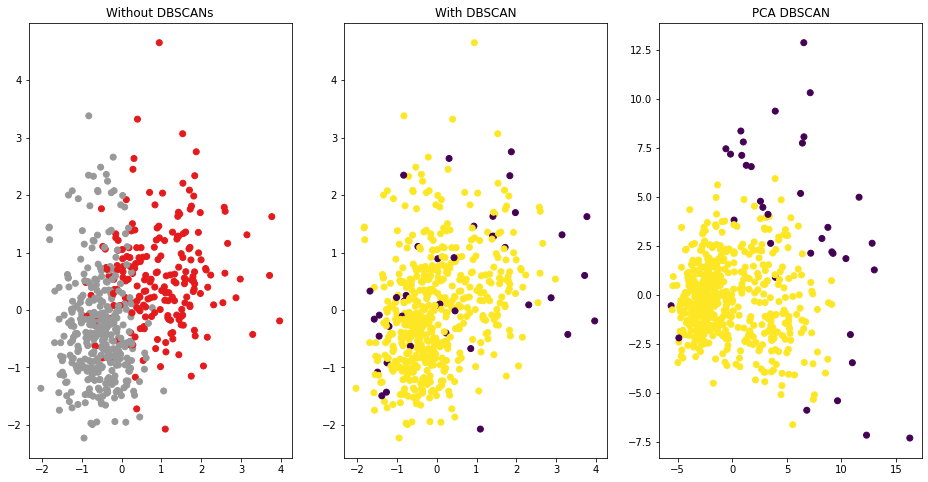

In [85]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
x3 = pca_data[:,0]
y3 = pca_data[:,1]
fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[1].scatter(x1, y1, c=labels)
ax[2].scatter(x3, y3, c=pca_labels)
ax[0].set_title('Without DBSCANs')
ax[1].set_title('With DBSCAN')
ax[2].set_title('PCA DBSCAN')